# $\Phi$-SO demo : SR weighting data points demo

In [35]:
# External packages
import numpy as np
import matplotlib.pyplot as plt
import torch

In [36]:
# Internal code import
import physo
import physo.learn.monitoring as monitoring

## Fixing seed

It is recommended to fix the seed for reproducibility:

In [3]:
# Seed
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

## Dataset

In [4]:
# Making toy synthetic data
t = np.random.uniform(0.1, 10, 1000)
X = np.stack((t,), axis=0)
y = np.exp(-1.45*t) + 0.5*np.cos(3.7*t)
y_weights = 0.01 + (t > 5.).astype(float)

Dataset plot

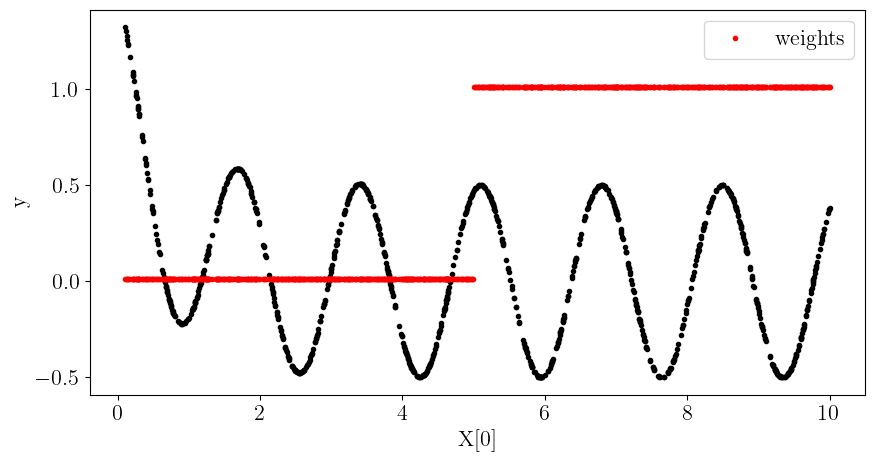

In [65]:
n_dim = X.shape[0]
fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
for i in range (n_dim):
    curr_ax = ax if n_dim==1 else ax[i]
    curr_ax.plot(X[i], y, 'k.',)
    curr_ax.set_xlabel("X[%i]"%(i))
    curr_ax.set_ylabel("y")
    # Weights
    curr_ax.plot(X[i], y_weights, 'r.', label="weights")
    curr_ax.legend()
plt.show()
fig.savefig("demo_weights_data_plot",dpi=200)

## Running SR task

### Logging config

In [6]:
save_path_training_curves = 'demo_curves.png'
save_path_log             = 'demo.log'

run_logger     = lambda : monitoring.RunLogger(save_path = save_path_log,
                                                do_save = True)

run_visualiser = lambda : monitoring.RunVisualiser (epoch_refresh_rate = 1,
                                           save_path = save_path_training_curves,
                                           do_show   = False,
                                           do_prints = True,
                                           do_save   = True, )

### Run

/opt/homebrew/anaconda3/envs/PhySO/lib/python3.8/site-packages/physo/task/args_handler.py:93: UserWarning: No units given for input variables, assuming dimensionless units.
  warnings.warn("No units given for input variables, assuming dimensionless units.")
/opt/homebrew/anaconda3/envs/PhySO/lib/python3.8/site-packages/physo/task/args_handler.py:105: UserWarning: No units given for root variable, assuming dimensionless units.
  warnings.warn("No units given for root variable, assuming dimensionless units.")
/opt/homebrew/anaconda3/envs/PhySO/lib/python3.8/site-packages/physo/task/args_handler.py:125: UserWarning: No units given for fixed constants, assuming dimensionless units.
  warnings.warn("No units given for fixed constants, assuming dimensionless units.")
/opt/homebrew/anaconda3/envs/PhySO/lib/python3.8/site-packages/physo/task/args_handler.py:152: UserWarning: No units given for class free constants, assuming dimensionless units.
  warnings.warn("No units given for class free co

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
SR task started...
=========== Epoch 00000 ===========
-> Time 2.62 s

Overall best  at R=0.827794
-> Raw expression : 
-(-c₁ + sin(t⋅log(-c₃ + t + t)))⋅-log(c₃)

Best of epoch at R=0.827794
-> Raw expression : 
-(-c₁ + sin(t⋅log(-c₃ + t + t)))⋅-log(c₃)


=========== Epoch 00001 ===========
-> Time 27.19 s

Overall best  at R=0.827794
-> Raw expression : 
-(-c₁ + sin(t⋅log(-c₃ + t + t)))⋅-log(c₃)

Best of epoch at R=0.634259
-> Raw expression : 
      ⎛⎛                    2      ⎞    ⎞
      ⎜⎜         ⎛ c₁⋅t    ⎞       ⎟    ⎟
c₁⋅sin⎝⎝c₂ - t + ⎝ℯ    ⋅1.0⎠  - 1.0⎠⋅1.0⎠


=========== Epoch 00002 ===========
-> Time 27.40 s

Overall best  at R=0.827794
-> Raw expression : 
-(-c₁ + sin(t⋅log(-c₃ + t + t)))⋅-log(c₃)

Best of epoch at R=0.629612
-> Raw expression : 
      ⎛⎛  

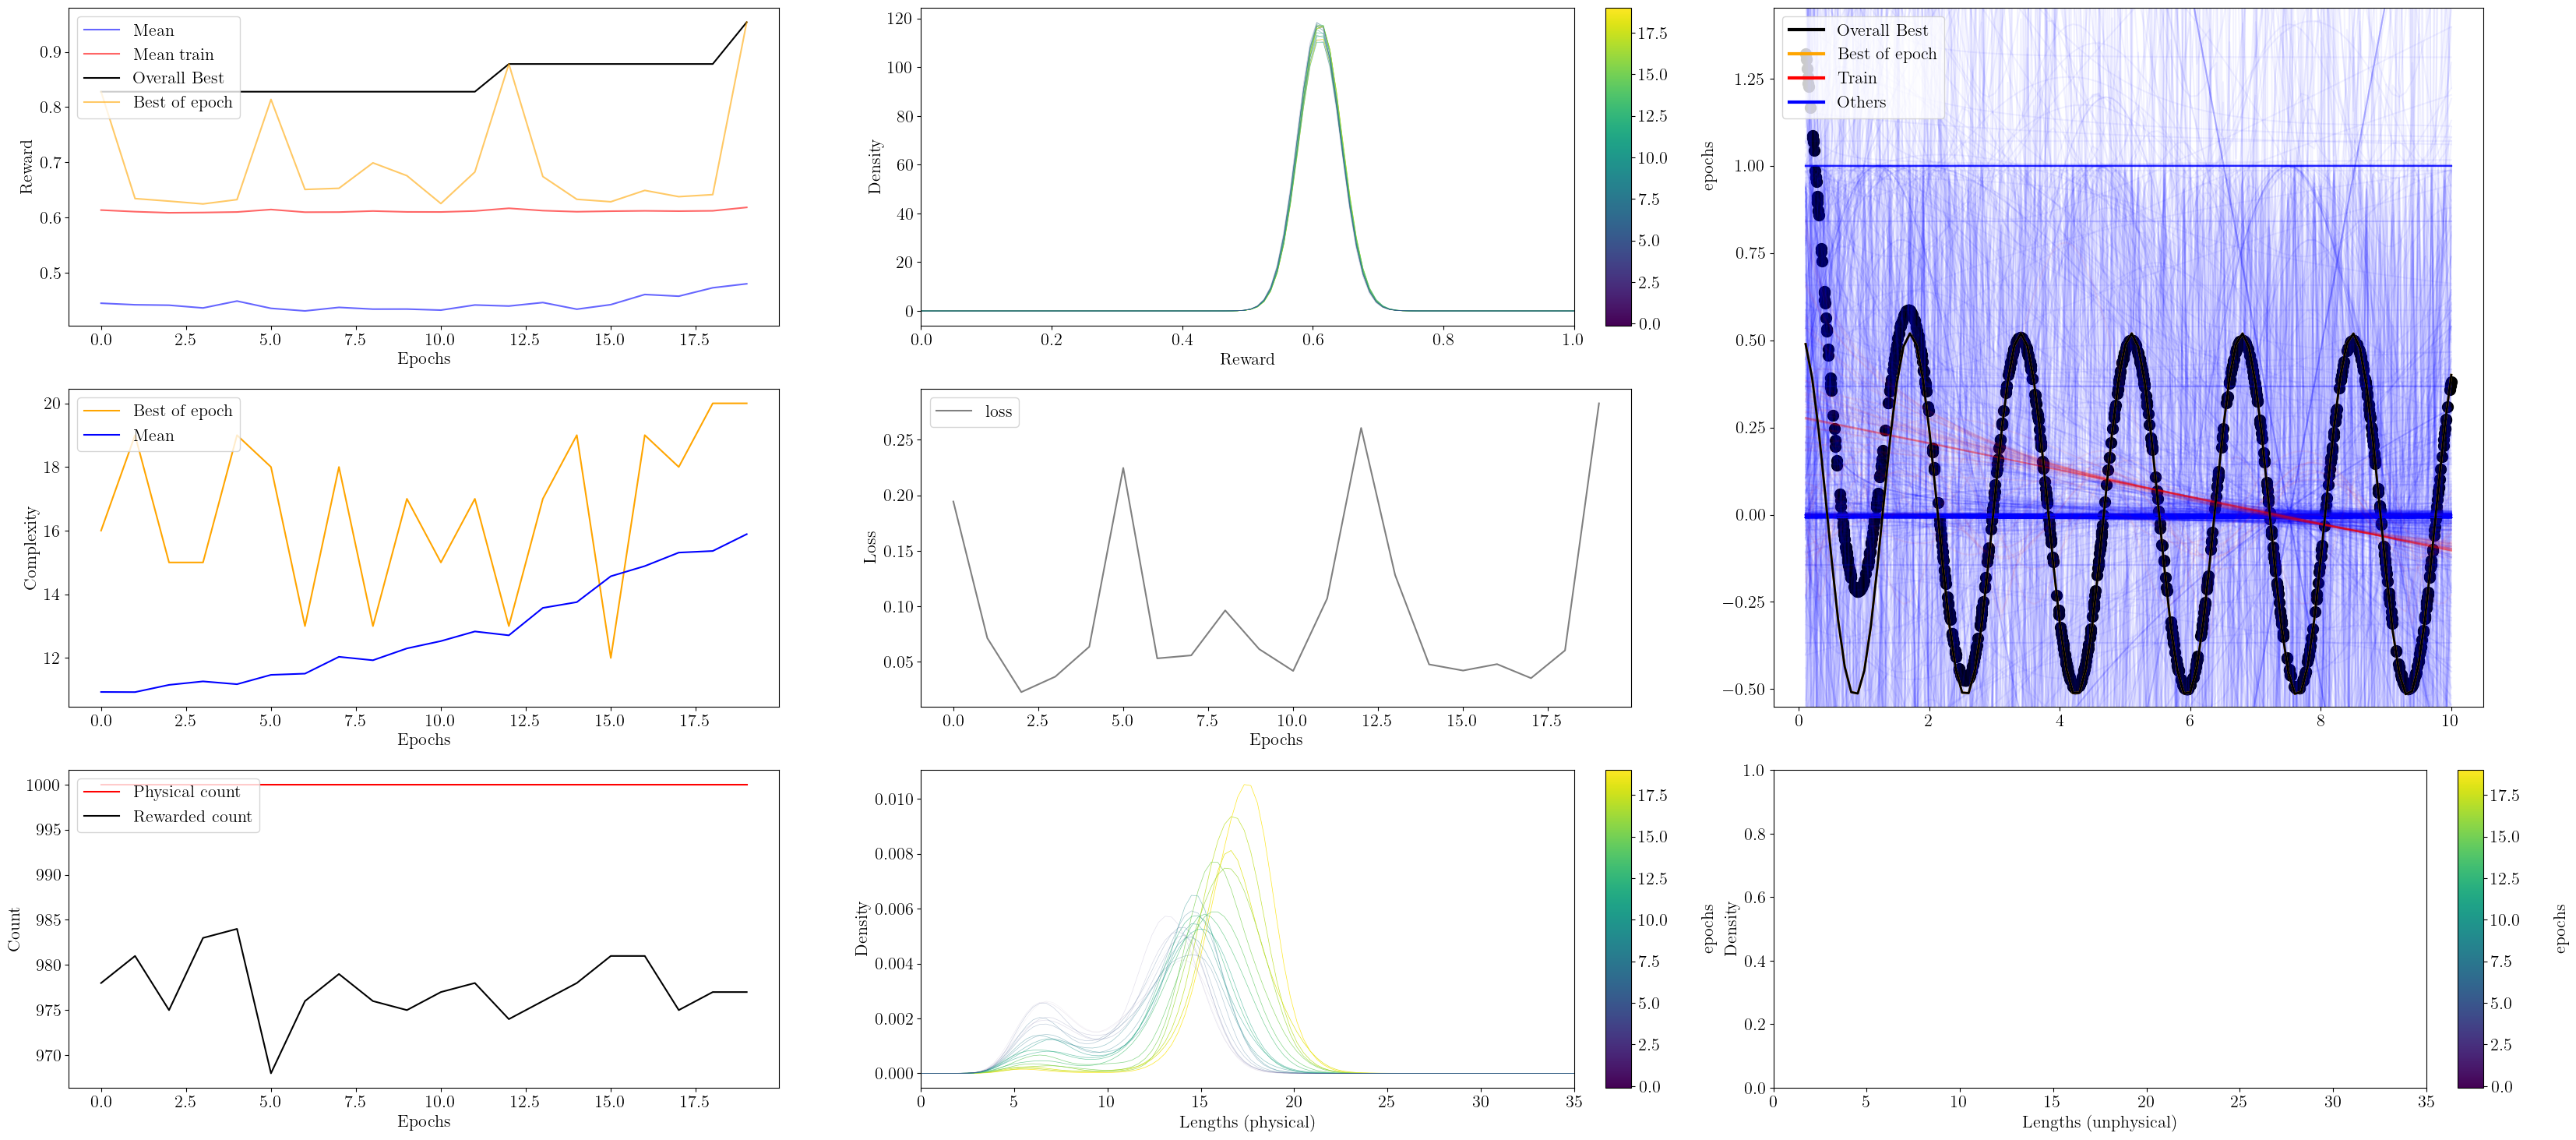

In [7]:
# Running SR task
expression, logs = physo.SR(X, y,
                            y_weights = y_weights,
                            # Giving names of variables (for display purposes)
                            X_names = [ "t"   ],
                            # Giving name of root variable (for display purposes)
                            y_name  = "y",
                            # Fixed constants
                            fixed_consts       = [ 1.      ],
                            # Free constants names (for display purposes)
                            free_consts_names = [ "c1", "c2", "c3",],
                            # Symbolic operations that can be used to make f
                            op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log", "sin", "cos"],
                            get_run_logger     = run_logger,
                            get_run_visualiser = run_visualiser,
                            # Run config
                            run_config = physo.config.config0.config0,
                            # Parallel mode (only available when running from python scripts, not notebooks)
                            parallel_mode = False,
                            # Number of iterations
                            epochs = 30

)

## Inspecting best expression found

### Getting best expression 

The best expression found (in accuracy) is returned in `expression`:

In [8]:
best_expr = expression
print(best_expr.get_infix_pretty())

   ⎛     c₃⋅c₃⋅(c₂ + c₂ + c₃ + c₃ + t)⎞
sin⎜c₂ + ─────────────────────────────⎟
   ⎝                  1.0             ⎠
───────────────────────────────────────
                   c₃                  


It can also be loaded later on from log files:

In [27]:
import physo
from physo.benchmark.utils import symbolic_utils as su
import sympy

# Loading pareto front expressions
pareto_expressions = physo.read_pareto_pkl("demo_curves_pareto.pkl")
# Most accurate expression is the last in the Pareto front:
best_expr = pareto_expressions[-1]
print(best_expr.get_infix_pretty())

   ⎛     c₃⋅c₃⋅(c₂ + c₂ + c₃ + c₃ + t)⎞
sin⎜c₂ + ─────────────────────────────⎟
   ⎝                  1.0             ⎠
───────────────────────────────────────
                   c₃                  


### Display

The expression can be converted into...  
A sympy expression:

In [28]:
best_expr.get_infix_sympy()

sin(c2 + c3*c3*(c2 + c2 + c3 + c3 + t)/1.0)/c3

A sympy expression (with evaluated free constants values):

In [29]:
best_expr.get_infix_sympy(evaluate_consts=True)[0]

0.519443317596468*sin(3.70615580351008*t + 26.6574530128894)

A latex string:

In [30]:
best_expr.get_infix_latex()

'\\frac{\\sin{\\left(c_{2} + c_{3}^{2} \\cdot \\left(2 c_{2} + 2 c_{3} + t\\right) \\right)}}{c_{3}}'

A latex string (with evaluated free constants values):

In [31]:
sympy.latex(best_expr.get_infix_sympy(evaluate_consts=True))

'\\mathtt{\\text{[0.519443317596468*sin(3.70615580351008*t + 26.6574530128894)]}}'

### Getting free constant values

Free constants

In [32]:
best_expr.free_consts

FreeConstantsTable
 -> Class consts (['c1' 'c2' 'c3']) : (1, 3)
 -> Spe consts   ([]) : (1, 0, 1)

In [33]:
best_expr.free_consts.class_values

tensor([[1.0000, 1.4726, 1.9251]], dtype=torch.float64)

### Checking exact symbolic recovery

In [34]:
# To sympy
best_expr = best_expr.get_infix_sympy(evaluate_consts=True)

best_expr = best_expr[0]

# Printing best expression simplified and with rounded constants
print("best_expr : ", su.clean_sympy_expr(best_expr, round_decimal = 4))

# Target expression was:
target_expr = sympy.parse_expr("0.5*cos(3.7*t)")
print("target_expr : ", su.clean_sympy_expr(target_expr, round_decimal = 4))

# Check equivalence
print("\nChecking equivalence:")
is_equivalent, log = su.compare_expression(
                        trial_expr  = best_expr,
                        target_expr = target_expr,
                        round_decimal = 1,
                        handle_trigo            = True,
                        prevent_zero_frac       = True,
                        prevent_inf_equivalence = True,
                        verbose                 = True,
)
print("Is equivalent:", is_equivalent)

best_expr :  0.5194*sin(3.7062*t + 26.6575)
target_expr :  0.5*cos(3.7*t)

Checking equivalence:
  -> Assessing if 0.5*cos(3.7*t) (target) is equivalent to 0.519443317596468*sin(3.70615580351008*t + 26.6574530128894) (trial)
   -> Simplified expression : 0.5*sin(3.7*t + 26.7)
   -> Symbolic error        : -0.5*sin(3.7*t + 26.7) + 0.5*cos(3.7*t)
   -> Symbolic fraction     : cos(3.7*t)/sin(3.7*t + 26.7)
   -> Trigo symbolic error        : 0
   -> Trigo symbolic fraction     : 1
   -> Equivalent : True
Is equivalent: True


### Fit plot

In [66]:
# Reloading expression
best_expr = pareto_expressions[-1]
# Making predictions
X_extended = np.stack( [np.linspace(X.min(), X.max(), 1000),] )
y_pred = best_expr(torch.tensor(X_extended))

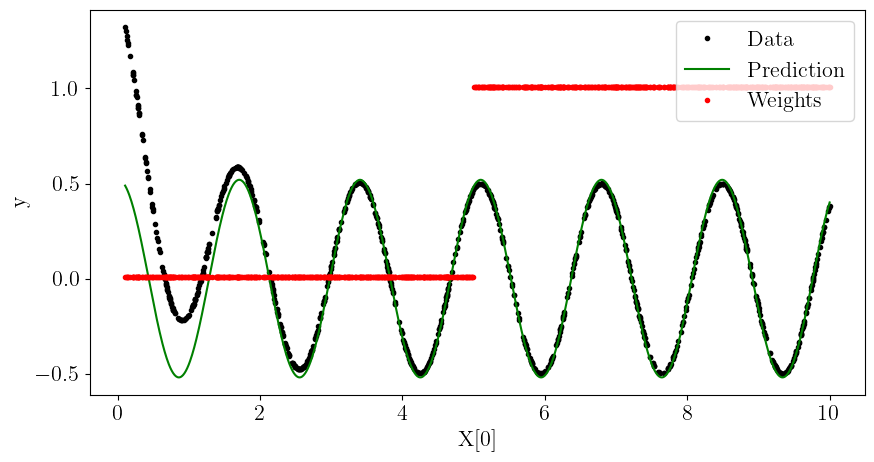

In [67]:
n_dim = X.shape[0]
fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
for i in range (n_dim):
    curr_ax = ax if n_dim==1 else ax[i]
    # Data
    curr_ax.plot(X[i], y, 'k.', label="Data")
    # Prediction
    curr_ax.plot(X_extended[i], y_pred, 'g-', label="Prediction")
    # Weights
    curr_ax.plot(X[i], y_weights, 'r.', label="Weights")
    curr_ax.legend(loc="upper right")
    # Labels
    curr_ax.set_xlabel("X[%i]"%(i))
    curr_ax.set_ylabel("y")
plt.show()

fig.savefig("demo_weights_results_plot",dpi=200)